<h1> Tokenizer -> Vector -> NN </h1>
<h3> Using PyTorch </h3>
<h3> Dr. Abraham Aldaco </h3>
<h3> June 7, 2025</h3>

In [2]:
import torch
import torch.nn as nn

In [3]:
# 1. Input text
text = "Tokenizer prepares the text for the machine processing."

In [4]:
# 2. Basic tokenization (splitting by spaces)
tokens = text.lower().replace(".", "").split()

In [5]:
tokens

['tokenizer', 'prepares', 'the', 'text', 'for', 'the', 'machine', 'processing']

In [6]:
# 3. Create a toy vocabulary
vocab = {word: idx for idx, word in enumerate(set(tokens))}
vocab_size = len(vocab)
print("Vocabulary:", vocab)

Vocabulary: {'processing': 0, 'for': 1, 'tokenizer': 2, 'prepares': 3, 'text': 4, 'machine': 5, 'the': 6}


In [7]:
vocab

{'processing': 0,
 'for': 1,
 'tokenizer': 2,
 'prepares': 3,
 'text': 4,
 'machine': 5,
 'the': 6}

In [8]:
# 4. Map tokens to integer IDs
token_ids = [vocab[token] for token in tokens]
print("Token IDs:", token_ids)

Token IDs: [2, 3, 6, 4, 1, 6, 5, 0]


In [9]:
# 5. Embedding layer
embedding_dim = 8  # keep it small for simplicity
embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)


In [10]:
embedding

Embedding(7, 8)

In [11]:
# Convert to tensor
input_tensor = torch.tensor(token_ids)

In [12]:
input_tensor

tensor([2, 3, 6, 4, 1, 6, 5, 0])

In [13]:
# 6. Get word vectors (embeddings)
embedded = embedding(input_tensor)
print("Embedded vectors:\n", embedded)

Embedded vectors:
 tensor([[ 0.0769,  0.2325, -1.0274,  0.8823,  0.3448,  2.2765, -0.3892, -0.0397],
        [-1.8331,  1.6500,  2.1409,  1.1627,  0.1921, -0.1486,  0.1632,  0.7333],
        [-1.0851, -0.1812,  0.5194,  0.5649, -1.1100, -0.1207, -0.4247,  0.3175],
        [ 0.3195, -0.8642, -0.3282,  0.6259,  0.0832,  0.2968,  1.7238, -0.5362],
        [ 0.1742, -0.0992,  0.6010, -0.4233,  0.7054, -0.7344, -2.7576,  0.1515],
        [-1.0851, -0.1812,  0.5194,  0.5649, -1.1100, -0.1207, -0.4247,  0.3175],
        [-0.6787, -0.5617,  0.6767, -0.4149,  1.2115,  0.4026, -0.0674,  0.6673],
        [-0.6453, -0.1294,  0.8202, -0.9534, -0.5756,  1.6229,  1.2124, -2.1098]],
       grad_fn=<EmbeddingBackward0>)


In [14]:
# 7. Simulate a simple neural network layer (1 hidden linear layer)
linear_layer = nn.Linear(embedding_dim, 4)  # output 4 features per token
output = linear_layer(embedded)
print("Output to next layer:\n", output)

Output to next layer:
 tensor([[ 0.1748, -0.0067, -0.0671,  0.2363],
        [ 0.7117,  0.9856, -1.4215, -0.3179],
        [-0.4842,  0.4358,  0.1136, -0.0773],
        [ 0.5885,  0.4342,  0.5176, -0.0836],
        [-0.7912, -0.8245, -0.0200,  0.1152],
        [-0.4842,  0.4358,  0.1136, -0.0773],
        [-0.0396, -0.0565, -0.0877, -0.1660],
        [ 0.0465,  0.6761,  0.0345,  0.7816]], grad_fn=<AddmmBackward0>)


<h3><span style="color:Green">Explanation of the <strong>Step #7</strong></span></h3>

<h4 style="color:orange">The line :<span style="font-family:'Courier New'; color:blue">linear_layer = nn.Linear(embedding_dim, 4)</span></h4>



<ul>
  <li>Creates a fully connected (dense) linear layer.</li>
  <li><strong>embedding_dim</strong> is the input size (e.g., 8). This matches the size of the word embedding vectors.</li>
  <li><strong>4</strong> is the output size, meaning each input embedding will be transformed into a 4-dimensional vector.</li>
</ul>

<p>In math terms: </p>
For each input vector  

$\vec{x} \in \mathbb{R}^{embedding\_dim}$

the linear layer computes:

$
\vec{y} = W \vec{x} + \vec{b}
$

where $W \in \mathbb{R}^{4 \times embedding\_dim}, \quad \vec{b} \in \mathbb{R}^4$

<h4 style="color:orange">The line : <span style="font-family:'Courier New'; color:blue">output = linear_layer(embedded)</span></h4>
<ul>
  <li>Applies the linear transformation to the <b>entire sequence</b> of embedded tokens.</li>
  <li>If <b>embedded</b> has shape <b>(seq_len, embedding_dim)</b>, then:
      <ul>
          <li><b>output</b> will have shape <b>(seq_len, 4)</b> — each token is now represented by a new 4-dimensional vector. </li>
      </ul>
  </li>

</ul>

<h1 style="color:black"> Measure Cosine Similarity Between Word Embeddings </h1>

In [20]:
from torch.nn.functional import cosine_similarity

In [25]:
print(tokens)
print()
print(embedded)

['tokenizer', 'prepares', 'the', 'text', 'for', 'the', 'machine', 'processing']

tensor([[ 0.0769,  0.2325, -1.0274,  0.8823,  0.3448,  2.2765, -0.3892, -0.0397],
        [-1.8331,  1.6500,  2.1409,  1.1627,  0.1921, -0.1486,  0.1632,  0.7333],
        [-1.0851, -0.1812,  0.5194,  0.5649, -1.1100, -0.1207, -0.4247,  0.3175],
        [ 0.3195, -0.8642, -0.3282,  0.6259,  0.0832,  0.2968,  1.7238, -0.5362],
        [ 0.1742, -0.0992,  0.6010, -0.4233,  0.7054, -0.7344, -2.7576,  0.1515],
        [-1.0851, -0.1812,  0.5194,  0.5649, -1.1100, -0.1207, -0.4247,  0.3175],
        [-0.6787, -0.5617,  0.6767, -0.4149,  1.2115,  0.4026, -0.0674,  0.6673],
        [-0.6453, -0.1294,  0.8202, -0.9534, -0.5756,  1.6229,  1.2124, -2.1098]],
       grad_fn=<EmbeddingBackward0>)


In [16]:
# Compare similarity between "text" and "machine"
vec1 = embedded[tokens.index("text")]
vec2 = embedded[tokens.index("machine")]
similarity = cosine_similarity(vec1, vec2, dim=0)
print(f"Cosine similarity between 'text' and 'machine': {similarity.item():.4f}")

Cosine similarity between 'text' and 'machine': -0.1153


In [ ]:
# Compare similarity between "tokenizer" and "processing"
vec1 = embedded[tokens.index("tokenizer")]
vec2 = embedded[tokens.index("processing")]
similarity = cosine_similarity(vec1, vec2, dim=0)
print(f"Cosine similarity between 'text' and 'machine': {similarity.item():.4f}")

Cosine similarity between 'text' and 'machine': 0.1502


<h1 style="color:black">Visualize Embeddings</h1>

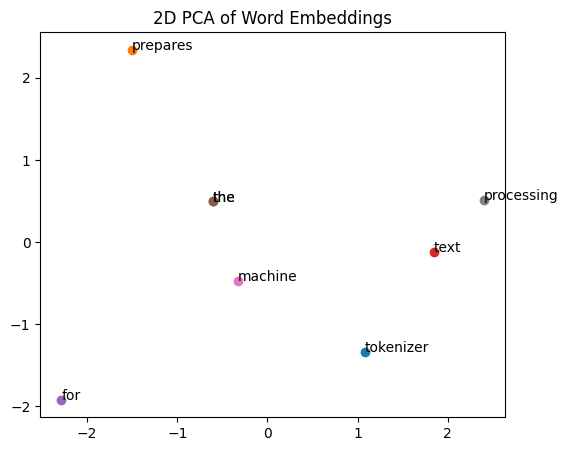

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

embedded_np = embedded.detach().numpy()
pca = PCA(n_components=2)
reduced = pca.fit_transform(embedded_np)

plt.figure(figsize=(6, 5))
for i, word in enumerate(tokens):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0], reduced[i, 1], word)
plt.title("2D PCA of Word Embeddings")
plt.show()